In [1]:
import numpy as np
import os
import pandas as pd
import torch
import albumentations as A
import albumentations.pytorch
import cv2
import sys
import random
import csv
import json
import matplotlib.pyplot as plt

sys.path.append('../')
from visualize import visualize
from utils import *

%matplotlib inline

In [2]:
df = pd.read_csv('../saved/df.csv')
df.shape

(24782, 14)

In [3]:
df.label = df.label.apply(lambda x : CLASS_MAPPER[str(x)])
df = drop_wrong(df)
df.reset_index(drop=True, inplace=True)
print(df.shape)

(22663, 14)


In [4]:
train_inds, test_inds = paps_data_split(df)

In [5]:
print(len(train_inds))
print(len(test_inds))

15187
7457


In [6]:
len(set(train_inds))

15187

In [8]:
len(set(test_inds))

7457

In [7]:
max(test_inds)

22662

In [9]:
df.label.value_counts()

ASC-US       11057
LSIL          5249
Negative      3647
HSIL          1466
ASC-H         1225
Carcinoma       19
Name: label, dtype: int64

In [ ]:
train_df = df

In [11]:
df = pd.read_csv('../saved/df.csv')
df.label = df.label.apply(lambda x : CLASS_MAPPER[str(x)])
df = drop_wrong(df)
df.reset_index(drop=True, inplace=True)
print(df.shape)

(22663, 14)


In [13]:
df = df.sort_values('area', axis=0)

../../lbp_data/patch_images/2021.01.11/LBC200-20210106(1)/LBC200-20210106(1)_1023.png [ 664 1502   12   24] ['LSIL'] [16]
../../lbp_data/patch_images/2021.06.07/LBC1788-20210201(1)/LBC1788-20210201(1)_1494.png [749 774  40  37] ['ASC-H'] [38]
../../lbp_data/patch_images/2021.06.02/LBC1578-20210128(1)/LBC1578-20210128(1)_359.png [ 886 1066   37   43] ['ASC-H'] [39]
../../lbp_data/patch_images/2021.06.11/LBC1947-20210203(1)/LBC1947-20210203(1)_672.png [546 700  46  37] ['HSIL'] [41]
../../lbp_data/patch_images/2021.06.02/LBC1578-20210128(1)/LBC1578-20210128(1)_359.png [ 896 1016   34   52] ['ASC-H'] [42]
../../lbp_data/patch_images/2021.05.28/LBC1291-20210125(1)/LBC1291-20210125(1)_1839.png [952 978  45  40] ['Negative'] [42]
../../lbp_data/patch_images/2021.06.11/LBC1947-20210203(1)/LBC1947-20210203(1)_672.png [590 694  40  46] ['HSIL'] [42]
../../lbp_data/patch_images/2021.01.12/LBC311-20210108(1)/LBC311-20210108(1)_838.png [1369  625   43   42] ['HSIL'] [42]
../../lbp_data/patch_image

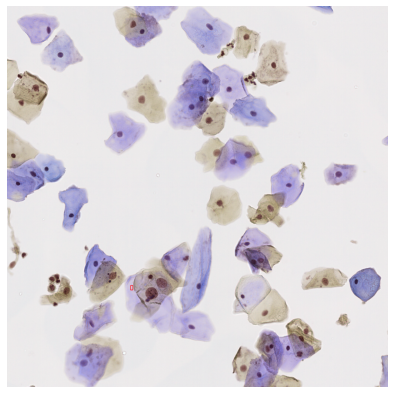

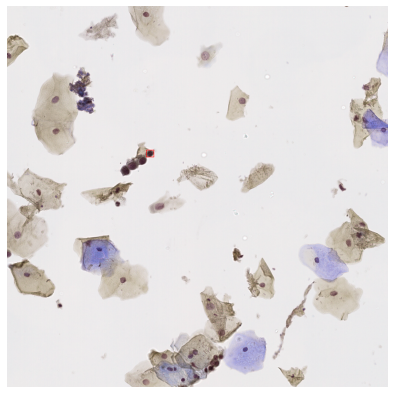

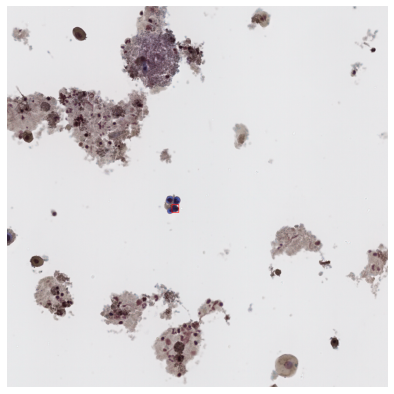

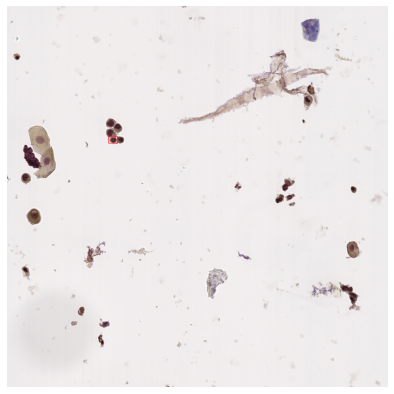

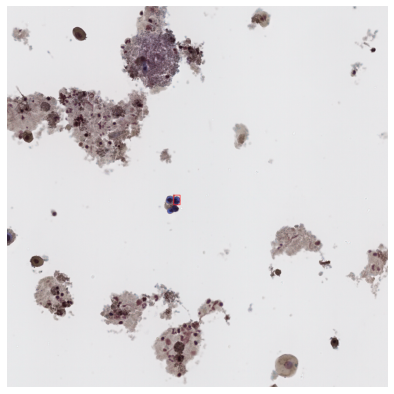

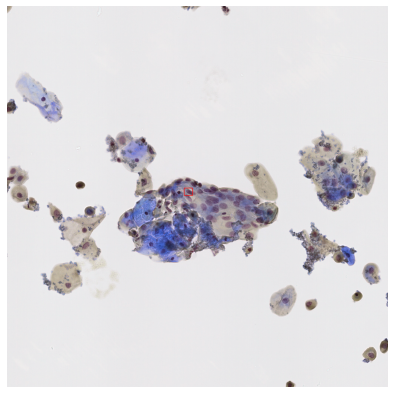

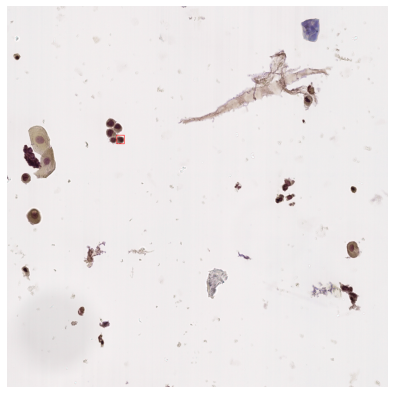

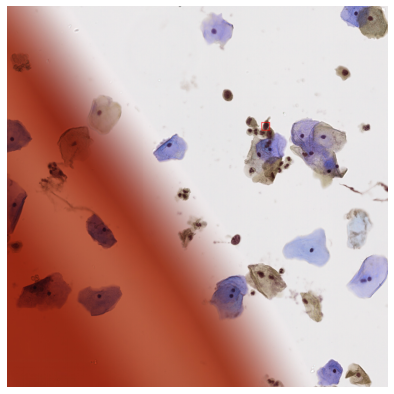

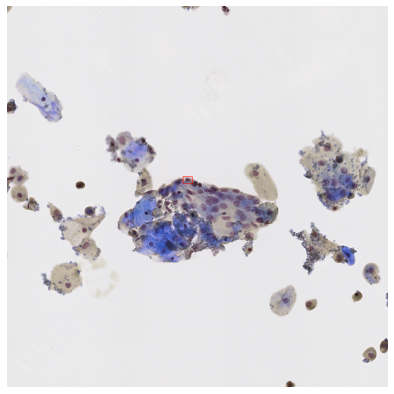

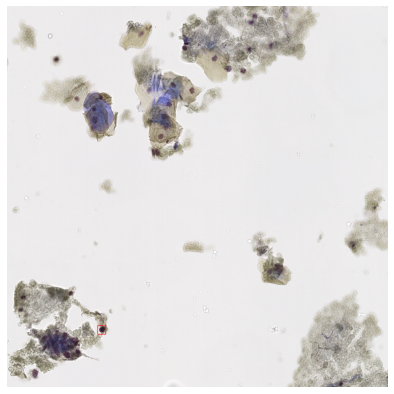

In [14]:
rel_path = '../../lbp_data/'

for NUM in range(10) :
    path = rel_path + df[['file_name']].values[NUM][0]
    boxes = df[['xmin', 'ymin', 'w', 'h']].values[NUM]
    label = df[['label']].values[NUM]
    area = df[['area']].values[NUM]
    print(path, boxes, label, area)
    img = cv2.imread(path)
    visualize(img, [boxes])  